## Implement vanilla autoencoder on MNIST dataset and calculate the loss vs. epoch curve for training and validation set.

In [1]:
import tensorflow, keras
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = tensorflow.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

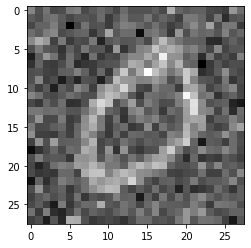

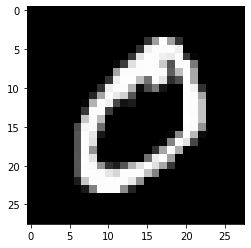

In [8]:
plt.imshow(x_train_noisy[1])
plt.gray()
plt.show()
plt.imshow(x_train[1])

In [9]:
x_train_noisy = np.clip(x_train_noisy,0,1)
x_test_noisy = np.clip(x_test_noisy,0,1)

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1,(3,3), activation='relu', padding='same'))

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [13]:
history = model.fit(x_train_noisy, x_train, epochs=5, batch_size=120, validation_data=(x_test_noisy,x_test_noisy))

Epoch 1/5
500/500 [==============================] - 117s 225ms/step - loss: 0.0422 - val_loss: 0.0624
Epoch 2/5
500/500 [==============================] - 90s 179ms/step - loss: 0.0279 - val_loss: 0.0593
Epoch 3/5
500/500 [==============================] - 91s 182ms/step - loss: 0.0242 - val_loss: 0.0578
Epoch 4/5
500/500 [==============================] - 91s 182ms/step - loss: 0.0220 - val_loss: 0.0570
Epoch 5/5
500/500 [==============================] - 92s 183ms/step - loss: 0.0207 - val_loss: 0.0564


In [14]:
pred = model.predict(x_test_noisy)

313/313 [==============================] - 5s 16ms/step


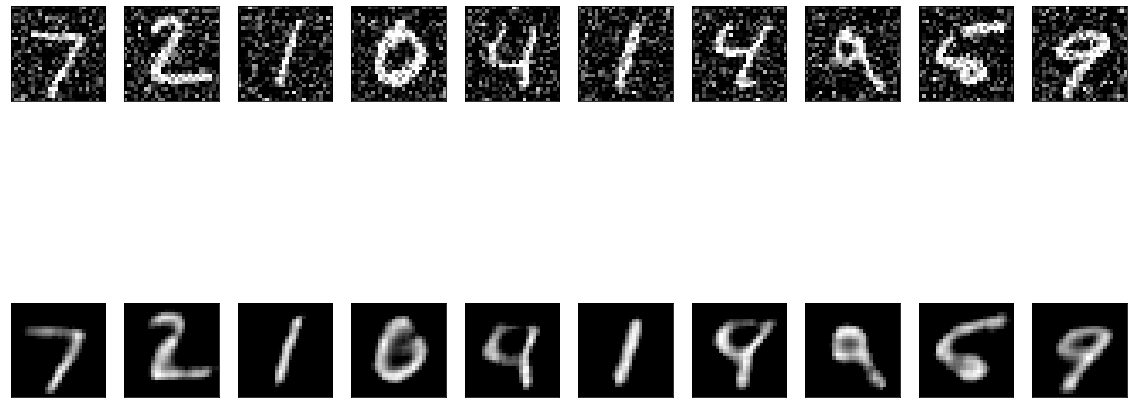

In [15]:
plt.figure(figsize=(20,10))
n = 10 
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,n,i+n+1)
    plt.imshow(pred[i].reshape(28,28))
    plt.xticks([]), plt.yticks([])
    
plt.show()

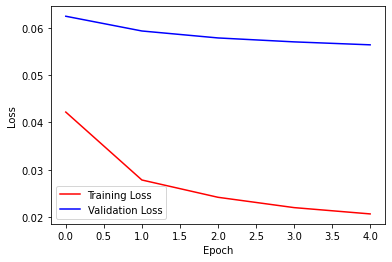

In [16]:
plt.plot(history.history['loss'],label='Training Loss',c='r')
plt.plot(history.history['val_loss'],label='Validation Loss',c='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
input_img = Input(shape=(784,))

encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [18]:
encoder = Model(input_img, encoded)

In [19]:
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [20]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
autoencoder.fit(x_train.reshape(x_train.shape[0], 784), x_train.reshape(x_train.shape[0], 784), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1620
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1044
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0965
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0951
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0945
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0942
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0941
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0939
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0938
Epoch 10/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0938


In [22]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ValueError: in user code:

    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28, 1)


In [ ]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(2, n, i + 1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.xticks([]); plt.yticks([])

plt.show()